# 빅데이터분석기사 실기 9회 체험
* 데이터는 따로 제공되지 않아 정답 코드만 넣어 놓았습니다.
* [빅데이터분석기사 실기 체험 링크](https://dataq.goorm.io/exam/3/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC-%EC%8B%A4%EA%B8%B0-%EC%B2%B4%ED%97%98/quiz/1)
* 참고 영상
    * [빅분기 실기 1유형](https://www.youtube.com/watch?v=qqY4XD2Ol5I)
    * [빅분기 실기 2유형](https://www.youtube.com/watch?v=3aAS0yyqLV4)
    * [빅분기 실기 3유형](https://www.youtube.com/watch?v=-mYXKWBmwZM)

---

# 1유형
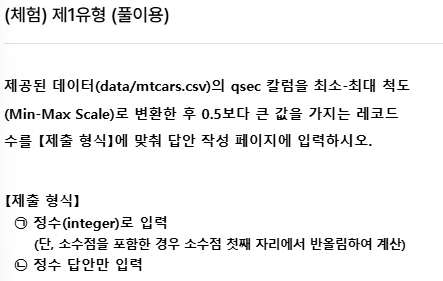

In [ ]:
# 출력을 원할 경우 print() 함수 활용
# 예시) print(df.head())

# getcwd(), chdir() 등 작업 폴더 설정 불필요
# 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

import pandas as pd

df = pd.read_csv("data/mtcars.csv")

# 사용자 코딩
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["qsec"] = scaler.fit_transform(df[["qsec"]])

print(len(df[df["qsec"]>0.5]))

---

# 2유형
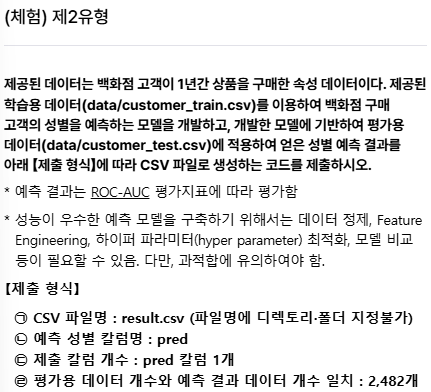
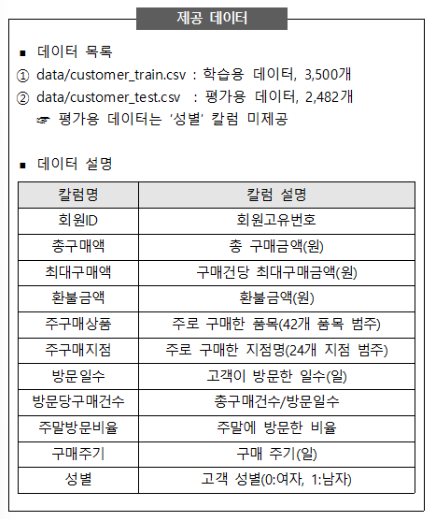
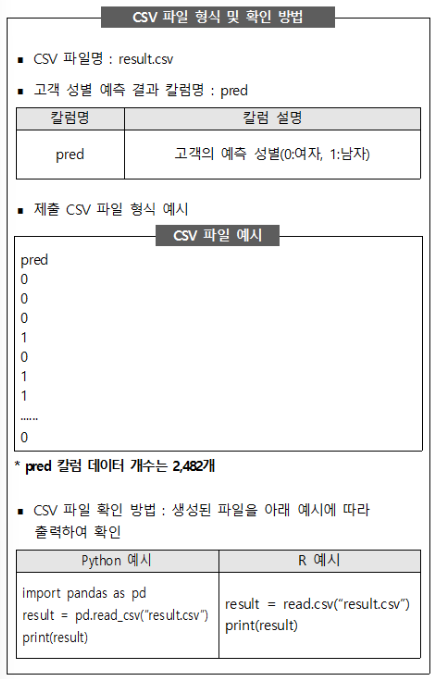

In [ ]:
# 출력을 원하실 경우 print() 함수 활용
# 예시) print(df.head())

# getcwd(), chdir() 등 작업 폴더 설정 불필요
# 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

import pandas as pd

train = pd.read_csv("data/customer_train.csv")
test = pd.read_csv("data/customer_test.csv")

# 사용자 코딩
# 1. 데이터 유형 파악
# print(train.info())
# print(test.info())

# 2. 데이터 전처리
# (1) x, y, train/test set 분리
x_train = train.drop(["회원ID", "성별"], axis=1)
y = train["성별"]
x_test = test.drop(["회원ID"], axis=1)

# print(x_train.shape, y.shape, x_test.shape)

#(2) 결측치 처리 0 또는 평균값으로 채우기
x_train["환불금액"] = x_train["환불금액"].fillna(0)
x_test["환불금액"] = x_test["환불금액"].fillna(0)

# print(x_train.isna().sum())
# print(x_test.isna().sum())

# (3) 수치형 변수 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_columns = x_train.select_dtypes(exclude="object").columns
x_train[num_columns] = scaler.fit_transform(x_train[num_columns])
x_test[num_columns] = scaler.transform(x_test[num_columns])

# (4) 범주형 변수 인코딩
# train : 피자 치킨 콜라 사이다 -> 0 1 2 3
# test : 피자 치킨 콜라 사이다 맥주 -> 0 1 2 3 4

# print(set(x_test["주구매상품"]) - set(x_train["주구매상품"]))
# print(set(x_test["주구매지점"]) - set(x_train["주구매지점"]))
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

x_train["주구매상품"] = encoder.fit_transform(x_train["주구매상품"])
x_test["주구매상품"] = encoder.transform(x_test["주구매상품"])
x_train["주구매지점"] = encoder.fit_transform(x_train["주구매지점"])
x_test["주구매지점"] = encoder.transform(x_test["주구매지점"])


# 3. 데이터 분리 (stratify는 분류일 때 넣으면 좋다.)
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y, test_size=0.2, stratify=y)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)


# 4, 모델 학습 및 검증
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_val_pred = model.predict(x_val)


# 5. 평가
from sklearn.metrics import roc_auc_score, accuracy_score
auc_score = roc_auc_score(y_val, y_val_pred)
acc = accuracy_score(y_val, y_val_pred)
print(auc_score, acc)


# 6. 결과
y_pred = model.predict(x_test)
result = pd.DataFrame(y_pred, columns=["pred"])
result.to_csv("result.csv", index=False)


# 7. 생성 결과 확인
result = pd.read_csv("result.csv")
print(result)



# 답안 제출 참고
# 아래 코드는 예시이며 변수명 등 개인별로 변경하여 활용
# pd.DataFrame변수.to_csv("result.csv", index=False)


---

# 3유형
제공된 데이터(data/Titanic.csv)는 타이타닉호의 침몰 사건에서 생존한 승객 및 사망한 승객의 정보를 포함한  자료이다. 아래 데이터를 이용하여 생존 여부(Survived)를 예측하고자 한다. 각 문항의 답을 【제출 형식】에 맞춰 답안 작성 페이지에 입력하시오. (단, 벌점화(penalty)는 부여하지 않는다.)

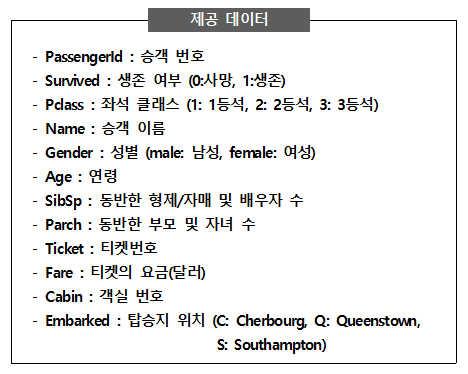

1. Gender와 Survived 변수 간의 독립성 검정을 실시하였을 때, 카이제곱 통계량은? (반올림하여 소수 셋째 자리까지 계산)


2. Gender, SibSp, Parch, Fare를 독립변수로 사용하여 로지스틱 회귀모형을 실시하였을 때, Parch 변수의 계수값은? (반올림하여 소수 셋째 자리까지 계산)

3. 위 ②번 문제에서 추정된 로지스틱 회귀모형에서 SibSp 변수가 한 단위 증가할 때 생존할 오즈비(Odds ratio) 값은? (반올림하여 소수 셋째 자리까지 계산)

【제출 형식】
  ㉠ 소수 넷째 자리에서 반올림하여 소수 셋째 자리까지만 계산

In [ ]:
 # 출력을 원할 경우 print() 함수 활용
# 예시) print(df.head())

# getcwd(), chdir() 등 작업 폴더 설정 불필요
# 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

import pandas as pd

df = pd.read_csv("data/Titanic.csv")

# 사용자 코딩


# 1번
from scipy.stats import chi2_contingency, ttest_1samp, ttest_ind, ttest_rel, chisquare

table = pd.crosstab(df["Gender"], df["Survived"])
print(chi2_contingency(table))

### 실행 결과 :
> Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

In [ ]:
# 2번
from statsmodels.api import Logit, OLS

formula = "Survived ~ Gender + SibSp + Parch + Fare"
results = Logit.from_formula(formula, df).fit()
print(results.summary())

### 실행 결과 :
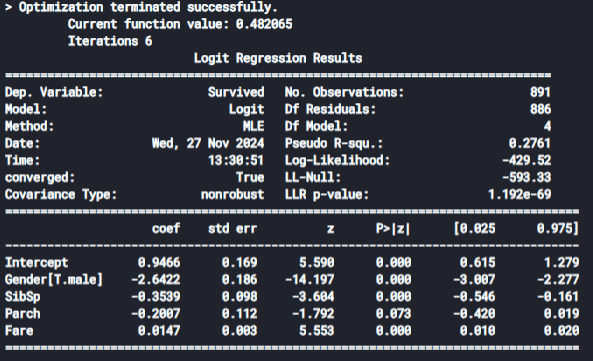

In [ ]:
# 3번
import numpy as np

print(np.exp(-0.3539))


# 해당 화면에서는 제출하지 않으며, 문제 풀이 후 답안제출에서 결괏값 제출

### 실행 결과 :
> Optimization terminated successfully.
         Current function value: 0.482065
         Iterations 6
0.7019451583616214